<a href="https://colab.research.google.com/github/hajri94/research-project/blob/main/data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 11780C.xlsx to 11780C.xlsx


In [ ]:
import io 
df = pd.read_excel(io.BytesIO(uploaded['11780C.xlsx']))
df=df.round(2)
df[df==0] = np.nan
df['Hour_day']=df['Hour_day'].fillna(0)
df




,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,POWER1,READ_DATE
0,1,1,1,2019,1,0.0,TUE,-1.15,22.0,2019-01-01 00:00:00
1,1,1,1,2019,2,1.0,TUE,-0.94,16.2,2019-01-01 01:00:00
2,1,1,1,2019,3,2.0,TUE,-0.80,16.4,2019-01-01 02:00:00
3,1,1,1,2019,4,3.0,TUE,-0.60,17.9,2019-01-01 03:00:00
4,1,1,1,2019,5,4.0,TUE,-0.10,18.9,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
8755,365,31,12,2019,8756,19.0,TUE,0.52,17.8,2019-12-31 19:00:00
8756,365,31,12,2019,8757,20.0,TUE,-0.72,24.4,2019-12-31 20:00:00
8757,365,31,12,2019,8758,21.0,TUE,-1.32,18.4,2019-12-31 21:00:00
8758,365,31,12,2019,8759,22.0,TUE,-1.69,2.7,2019-12-31 22:00:00


In [ ]:
for date in df[df.isna().any(axis=1)].READ_DATE:
   df[df.READ_DATE == date] = df[df.READ_DATE == date].fillna\
                                                   (df[(df.READ_DATE.dt.hour == date.hour)].mean())
df=df.round(1)
df 

,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,POWER1,READ_DATE
0,1,1,1,2019,1,0.0,TUE,-1.2,22.0,2019-01-01 00:00:00
1,1,1,1,2019,2,1.0,TUE,-0.9,16.2,2019-01-01 01:00:00
2,1,1,1,2019,3,2.0,TUE,-0.8,16.4,2019-01-01 02:00:00
3,1,1,1,2019,4,3.0,TUE,-0.6,17.9,2019-01-01 03:00:00
4,1,1,1,2019,5,4.0,TUE,-0.1,18.9,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
8755,365,31,12,2019,8756,19.0,TUE,0.5,17.8,2019-12-31 19:00:00
8756,365,31,12,2019,8757,20.0,TUE,-0.7,24.4,2019-12-31 20:00:00
8757,365,31,12,2019,8758,21.0,TUE,-1.3,18.4,2019-12-31 21:00:00
8758,365,31,12,2019,8759,22.0,TUE,-1.7,2.7,2019-12-31 22:00:00


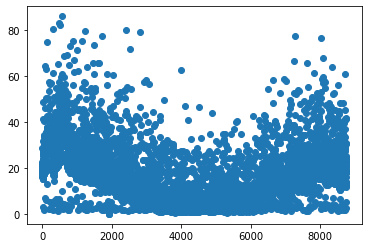

In [ ]:
plt.scatter(df['Hour'], df['POWER1'])
plt.show()


In [ ]:
# We calculate the interquartile range 
q25, q75 = percentile(df['POWER1'], 25), percentile(df['POWER1'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))


Percentiles: 25th=4.900, 75th=22.000, IQR=17.100


In [ ]:
# we set the limits (upper and lower )
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

Identified outliers: 147


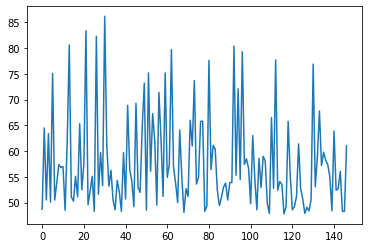

In [ ]:
# We identify the outliers
outliers = [x for x in df['POWER1'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# We plot the outliers graph 
plt.plot(outliers)
plt.show() 

Non-outlier observations: 8613


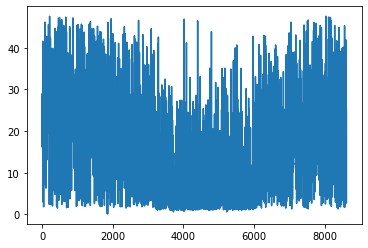

In [ ]:
# We remove the outliers
outliers_removed = [x for x in df['POWER1'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
# We plot the Non_outliers graph 
plt.plot(outliers_removed)
plt.show() 

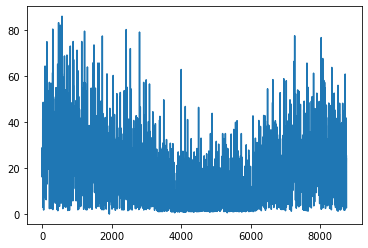

In [ ]:
# simple graph for the dataset before removing the outliers
plt.plot(df['POWER1'])
plt.show() 